In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [2]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
data.shape

(1025, 14)

In [4]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [8]:
# 0=female
# 1=male
data.groupby(data["sex"])["target"].agg(["value_counts"])


value_counts
sex target              
0   1                226
    0                 86
1   0                413
    1                300

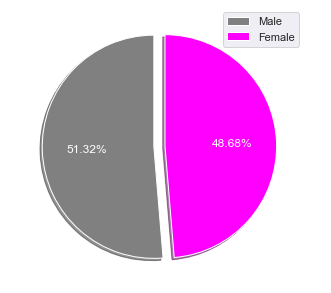

In [9]:
sex = ["Male", "Female"]
values = data["target"].value_counts()
color = ["#808080", "#FF00FF"]

plt.figure(figsize = (5, 7))
plt.pie(values, labels = sex, colors = color, explode = (0.1, 0), textprops = {"color":"w"}, autopct = "%.2f%%", shadow = True, startangle = 90)

plt.legend();

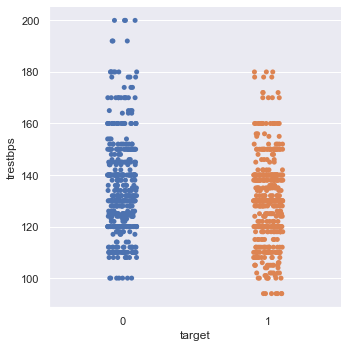

In [10]:
# Range based plot between BP and target use catplot freom seaborn
sns.catplot(x="target",y="trestbps",data=data,kind="strip")

In [11]:
data.groupby("sex")["cp"].agg(["value_counts"])

value_counts
sex cp              
0   0            133
    2            109
    1             57
    3             13
1   0            364
    2            175
    1            110
    3             64

<AxesSubplot:xlabel='cp', ylabel='count'>

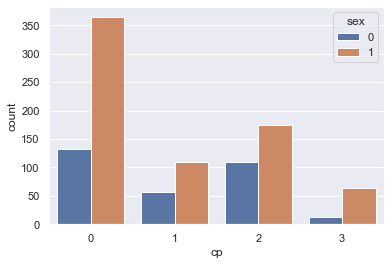

In [12]:
#Chest pain classification sex-wise(0=female,1=male)
sns.countplot(x = "cp", data = data, hue = "sex")

<AxesSubplot:xlabel='cp', ylabel='count'>

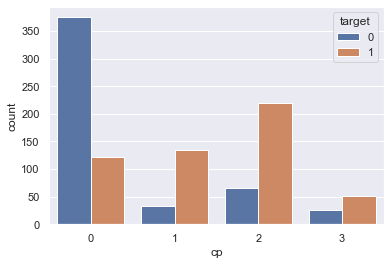

In [13]:
# Chest pain vs target
sns.countplot(x = "cp", data = data, hue = "target")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


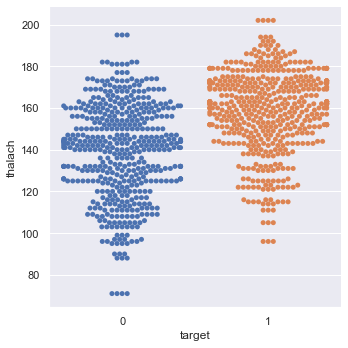

In [14]:
# Heart rate vs target
sns.catplot(x='target',y='thalach',data=data,kind='swarm')

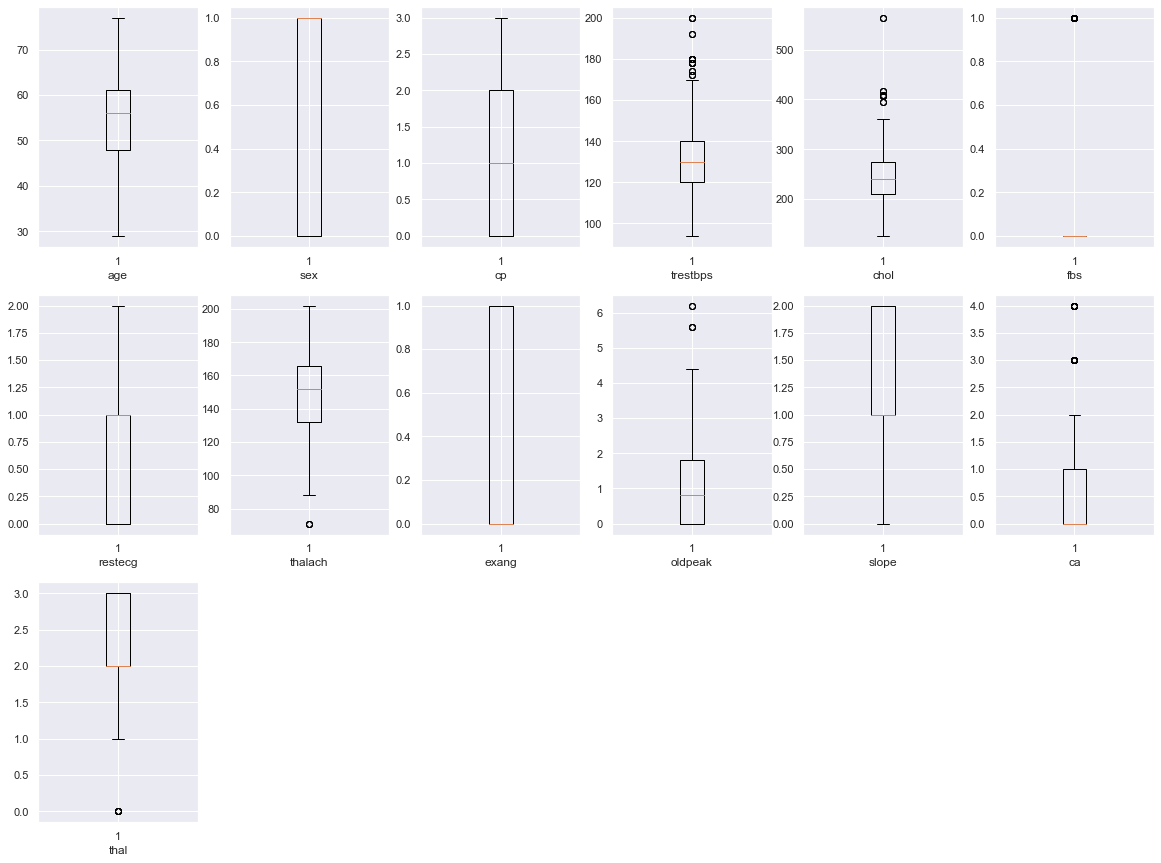

In [15]:
#detecting outliers
col = 1
plt.figure(figsize = (20, 15))
for i in data.columns:
    if col < 14:
        plt.subplot(3, 6, col)
        plt.boxplot(data[i])
        plt.xlabel(i)
    col = col + 1

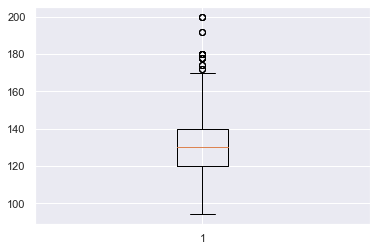

In [16]:
#Inter Quantile Range
q3=data["trestbps"].quantile(q=0.90)
q1=data["trestbps"].quantile(q=0.10)
IQR=q3-q1
IQR_lower_limit=int(q1-1.5*IQR)
IQR_upper_limit=int(q3+1.5*IQR)
data=data[data["trestbps"]>IQR_lower_limit]
data=data[data["trestbps"]<IQR_upper_limit]
plt.boxplot(data["trestbps"]);

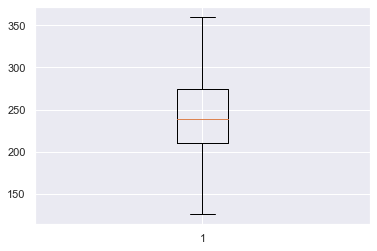

In [17]:
q3=data["chol"].quantile(q=0.75)
q1=data["chol"].quantile(q=0.25)
IQR=q3-q1
IQR_lower_limit=int(q1-1.5*IQR)
IQR_upper_limit=int(q3+1.5*IQR)
data=data[data["chol"]>IQR_lower_limit]
data=data[data["chol"]<IQR_upper_limit]
plt.boxplot(data["chol"]);

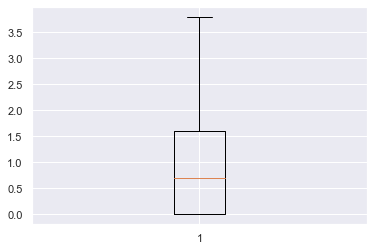

In [18]:
q3=data["oldpeak"].quantile(q=0.75)
q1=data["oldpeak"].quantile(q=0.25)
IQR=q3-q1
IQR_lower_limit=int(q1-1.5*IQR)
IQR_upper_limit=int(q3+1.5*IQR)
data=data[data["oldpeak"]>IQR_lower_limit]
data=data[data["oldpeak"]<IQR_upper_limit]
plt.boxplot(data["oldpeak"]);

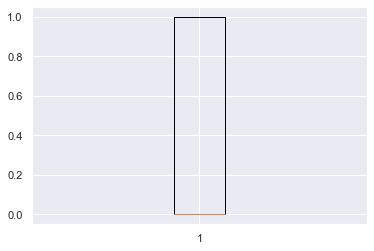

In [19]:
q3=data["ca"].quantile(q=0.75)
q1=data["ca"].quantile(q=0.25)
IQR=q3-q1
IQR_lower_limit=int(q1-1.5*IQR)
IQR_upper_limit=int(q3+1.5*IQR)
data=data[data["ca"]>IQR_lower_limit]
data=data[data["ca"]<IQR_upper_limit]
plt.boxplot(data["ca"]);

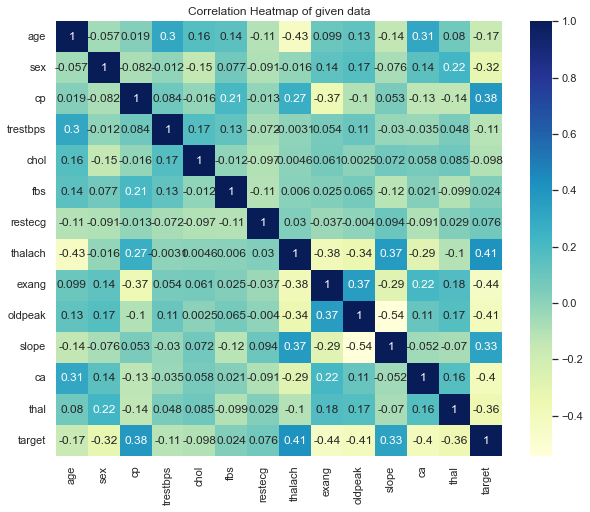

In [20]:
x=data.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(x, annot = True, cmap = "YlGnBu")
plt.title("Correlation Heatmap of given data");

In [21]:
#separate dependent(y) and independent(x)

x = data.drop(columns = ["target"])
y = data["target"]

In [22]:
#Using normalizati0n technique for scaling
x_scaled = MinMaxScaler()
x_scaled = x_scaled.fit_transform(x)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.20, random_state = 1200)

In [24]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
lr_acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mat = confusion_matrix(y_test, y_pred)
print(lr_acc)
print(f1)
print(mat)

0.8291139240506329
0.8556149732620321
[[51 16]
 [11 80]]


In [25]:
RF= RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred = RF.predict(x_test)
rf_accuracy = accuracy_score(y_test,y_pred)
print(rf_accuracy)
c_mat= confusion_matrix(y_test,y_pred)
print(c_mat)


0.9810126582278481
[[67  0]
 [ 3 88]]


In [26]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
y_pred = GB.predict(x_test)
gb_accuracy = accuracy_score(y_test,y_pred)
print(gb_accuracy)
confusion_mat= confusion_matrix(y_test,y_pred)
print(confusion_mat)


0.9746835443037974
[[66  1]
 [ 3 88]]


In [27]:
AB= AdaBoostClassifier()
AB.fit(x_train,y_train)
y_pred = AB.predict(x_test)
ab_accuracy = accuracy_score(y_test,y_pred)
print(ab_accuracy)
confusion_mat= confusion_matrix(y_test,y_pred)
print(confusion_mat)

0.9430379746835443
[[63  4]
 [ 5 86]]


In [28]:
svm= SVC()
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
sv_accuracy = accuracy_score(y_test,y_pred)
print(sv_accuracy)
confusion_mat = confusion_matrix(y_test,y_pred)
print(confusion_mat)


0.8607594936708861
[[56 11]
 [11 80]]


In [29]:
knn =  KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
kn_accuracy = accuracy_score(y_test,y_pred)
print(kn_accuracy)
confusion_mat = confusion_matrix(y_test,y_pred)
print(confusion_mat)

0.8481012658227848
[[55 12]
 [12 79]]


In [30]:
compare = pd.DataFrame({'Model': ['Logistic Regression',  'Random Forest',"Gradient Boosting",
                                     "Ada boost classifier","Support Vector Machine","K-nearest neighbor"], 
                          'Accuracy': [lr_acc*100,rf_accuracy*100, gb_accuracy*100, ab_accuracy*100,
                                      sv_accuracy*100,
                                     kn_accuracy*100]})
compare

,Model,Accuracy
0,Logistic Regression,82.911392
1,Random Forest,98.101266
2,Gradient Boosting,97.468354
3,Ada boost classifier,94.303797
4,Support Vector Machine,86.075949
5,K-nearest neighbor,84.810127


Text(0.5, 1.0, 'Comparision of accuracy of different algorithms')

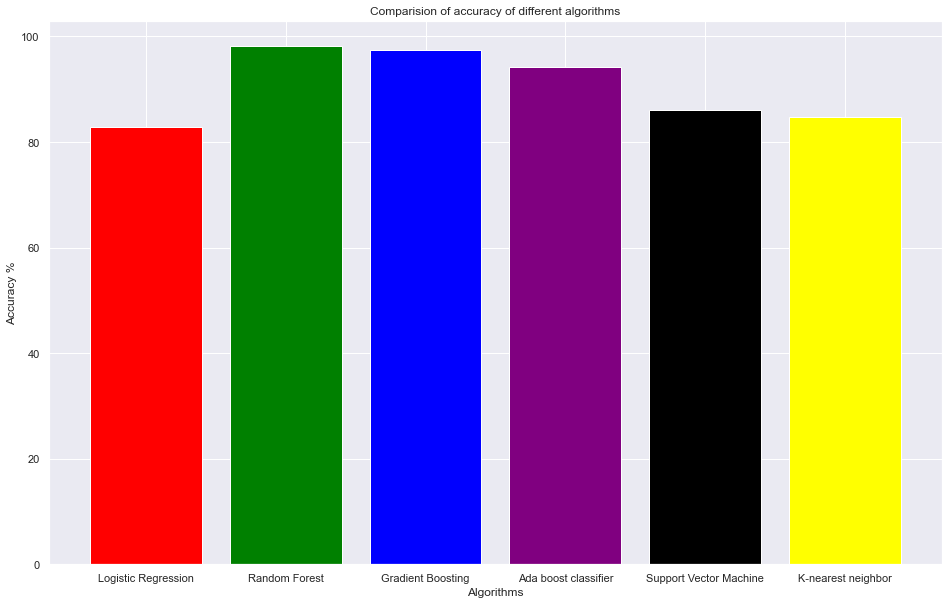

In [41]:
plt.figure(figsize=(16,10))
colors = ['red','green','blue','purple','black',"yellow"]
plt.bar(compare['Model'],compare['Accuracy'],color = colors)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy %')
plt.title('Comparision of accuracy of different algorithms')


# Conclusion
## visualization and compare different machine learning models based on accuracy and it is found that Gradient boosting and Random Forest work efficiently for this data set.